# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**Answer:**
#### 1. I am being asked to build a machine learning model that can determine whether a video on TikTok contains a claim or offers an opinion. 
- The success of the business/organizational objective can be evaluated using appropriate metrics such as precision, recall, F1-score, and accuracy. 
- However, considering the context of the task, precision and recall are likely to be more important. Precision measures the proportion of correctly predicted positive instances among all instances predicted as positive. Recall measures the proportion of correctly predicted positive instances among all actual positive instances.

#### 2. Ethical implications include potential biases in the model's predictions, as well as the potential impact on content creators and users. False positives could lead to unnecessary censorship of videos, affecting content creators' freedom of expression. False negatives could allow inappropriate content to remain on the platform, potentially harming users. Balancing these concerns is crucial.
- The platform might miss potentially harmful content that should have been flagged. This could lead to the spread of misinformation, inappropriate content, or harmful messages, potentially damaging the platform's credibility and user experience.
- Legitimate content might be wrongly flagged and potentially removed, leading to frustration for content creators and potentially impacting their willingness to use the platform. This could also hinder user engagement and growth.

#### 3. 
- **Data Collection and Labeling:** Gather a diverse and representative dataset of videos labeled as containing a claim or offering an opinion.
- **Data Preprocessing:** Clean, preprocess, and transform the data into a suitable format for modeling.
- Feature Engineering: Extract relevant features from the video content, comments, user engagement, and other metadata.
- **Model Selection:** Choose appropriate machine learning algorithms (e.g., text classification models, deep learning models) and consider ensemble techniques if needed.
- **Model Training and Evaluation:** Train the chosen models using a portion of the labeled data and evaluate their performance using cross-validation. Use metrics such as precision, recall, F1-score, and accuracy.
- **Hyperparameter Tuning:** Fine-tune the model's hyperparameters to optimize its performance on the chosen metrics.
- **Deployment and Monitoring:** Deploy the model to the platform's content review process, continuously monitoring its performance and collecting user feedback.
- **Iterative Improvement:** Regularly update and retrain the model to adapt to changing trends, new content, and evolving user behaviors.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Import packages for data assessing
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Import packages for data modelling
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [10]:

# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

There are no duplicate observations in the data.

Check for and handle outliers.

In [12]:
cols = ['video_duration_sec', 
        'video_view_count', 
        'video_like_count', 
        'video_share_count', 
        'video_download_count', 
        'video_comment_count']

def check_outliers(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    
    sns.histplot(dataframe[col], ax=ax[0])
    sns.despine()
    ax[0].set_title(f"Histogram of {col}")
    
    sns.boxplot(data=dataframe[col], ax=ax[1])  # Use data=data[col]
    sns.despine()
    ax[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show();

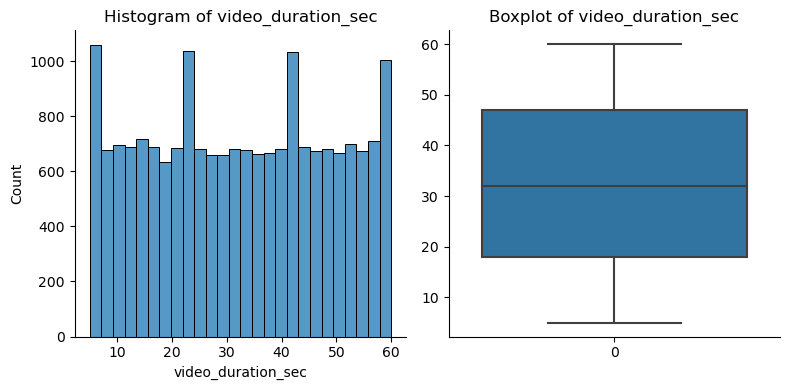

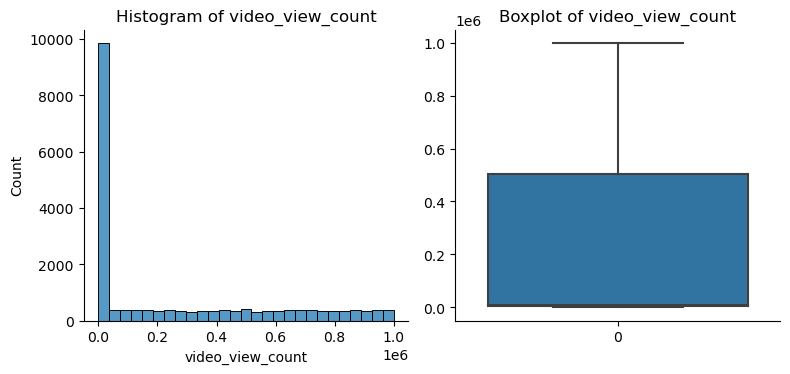

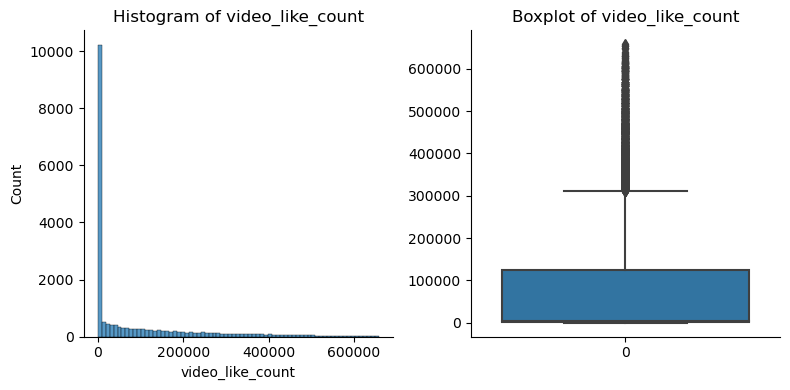

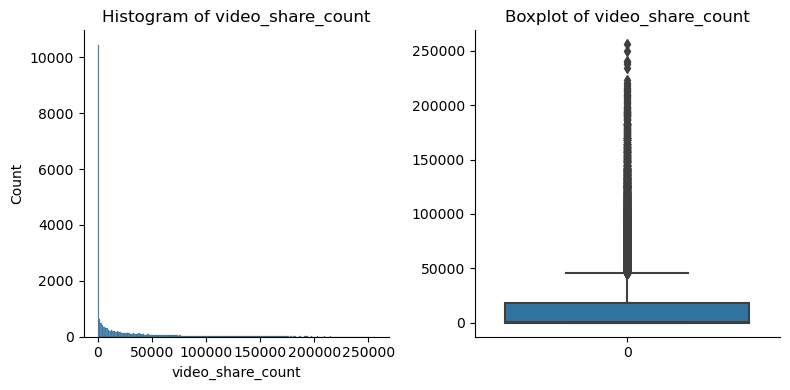

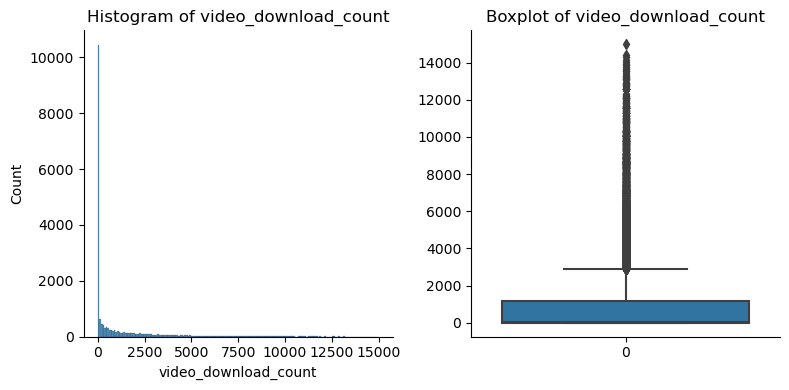

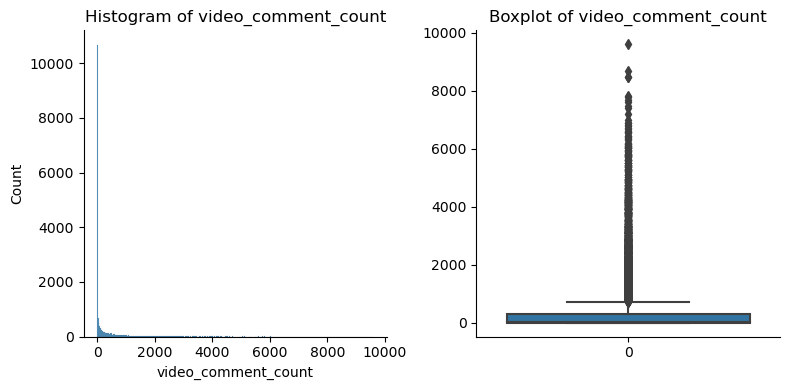

In [13]:
for col in cols:
    check_outliers(data, col)

'video_duration_sec' is the only one without having outliers. The others, which are **'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count'** are all have huge outliers at the top end and are extremely right-skewed. This can make it difficult to train a model on this data, as the model may be biased towards the outliers.

There are two main ways to handle outliers in this data:

- **Transform the data.** There are a number of ways to transform data to reduce the impact of outliers. One common approach is to log transform the data. This involves taking the logarithm of each value in the column. This has the effect of shrinking the values at the top end of the distribution, making them less extreme.
- **Remove the outliers.** Another approach is to simply remove the outliers from the dataset. This can be done by identifying the outliers using a statistical test, such as the z-score test. Once the outliers have been identified, they can be removed from the dataset.

#### I will use ensemble to handle outliers.

Check class balance.

In [14]:
# Check class balance
data["claim_status"].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

Class of target variable is quite balanced.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [15]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [16]:
data.groupby('claim_status')[['text_length']].mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


In [17]:
# Display first few rows of dataframe after adding new column
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for claims and opinions.

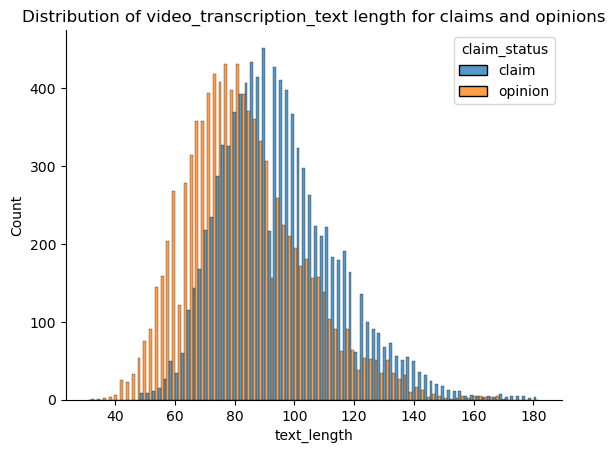

In [18]:
# Visualize the distribution of `video_transcription_text` length for claims and opinions
# Create two histograms in one plot
sns.histplot(data=data, x='text_length', hue='claim_status', multiple = 'dodge')
sns.despine()
plt.title("Distribution of video_transcription_text length for claims and opinions");

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

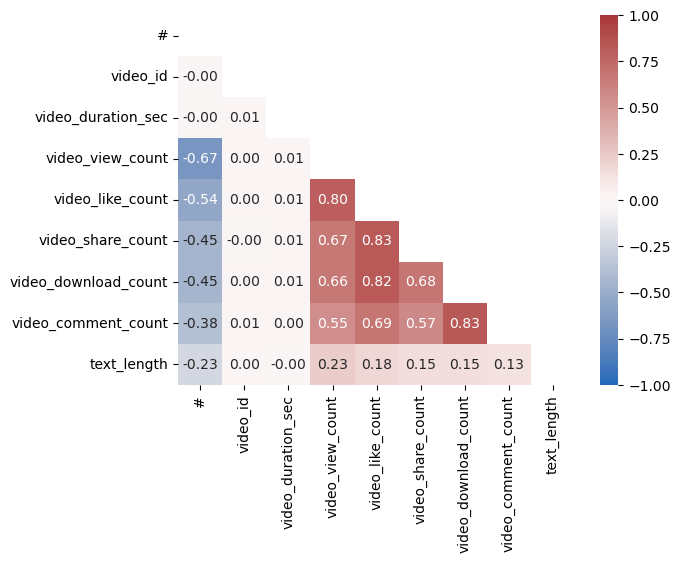

In [19]:
# Create a heatmap to visualize how correlated variables are
corr = data.corr(numeric_only=True)
sns.heatmap(corr, 
            annot=True, 
            mask=np.triu(corr), 
            fmt='.2f', 
            vmin=-1, vmax=1, 
            cmap='vlag');

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

Select the outcome variable.

In [20]:
# Select outcome variable
X = data.drop(['#', 'video_id', 'claim_status'], axis=1).copy()


y = data['claim_status']


**Feature selection and transformation**

Encode target and catgorical variables.

In [21]:
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)
y = np.where(y=='claim', 1, 0)

In [22]:
y

array([1, 1, 1, ..., 0, 0, 0])

### **Task 4. Split the data**


Assign target variable.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((12213, 11), (3054, 11), (3817, 11), (12213,), (3054,), (3817,))

Isolate the features.

In [25]:
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [27]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [28]:
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

### **BONUS CONTENT - Tokenize text column**

`from sklearn.feature_extraction.text import CountVectorizer`

**NOTE:** You are not expected to do this or know this, but you might find it useful and/or interesting to understand some basic ideas behind natural language processing (NLP), because of the nature of the data provided in this TikTok project.

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [29]:
# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Fit the vectorizer to the training data (generate the n-grams) and transform it (tally the occurrences). Only fit to the training data, not the validation or test data.

In [30]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_tr['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_tr.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,55,254459.0,66996.0,2673.0,220.0,95.0,97,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,40,433056.0,85389.0,13301.0,1766.0,1.0,110,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,29,997358.0,83574.0,17310.0,951.0,530.0,155,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,15,122973.0,53791.0,14407.0,257.0,8.0,89,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,948.0,309.0,61.0,8.0,2.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,34,761969.0,502599.0,94675.0,3242.0,1763.0,98,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,54,4168.0,965.0,106.0,9.0,2.0,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,8347.0,1684.0,134.0,39.0,7.0,84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,6902.0,2861.0,20.0,27.0,1.0,74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,37.0,8.0,1.0,0.0,0.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,22,6517.0,337.0,120.0,5.0,0.0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,758131.0,41367.0,11288.0,774.0,143.0,83,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17,613559.0,368043.0,113662.0,7130.0,4288.0,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,363966.0,196481.0,1246.0,1593.0,657.0,114,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,582955.0,86748.0,7182.0,865.0,21.0,98,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [61]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 0.2, 0.4, 0.6, 0.8, 'sqrt'],
    'max_samples': [None, 0.2, 0.4, 0.6, 0.8],
}



# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, 
                     params, 
                     scoring=scoring, 
                     n_jobs=-1, 
                     refit='f1', 
                     cv=5)

In [62]:
%%time

rf_cv.fit(X_train_final, y_tr)

CPU times: total: 3min 17s
Wall time: 2h 53min 7s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 0.2, 0.4, 0.6, 0.8, 'sqrt'],
                         'max_samples': [None, 0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [63]:
# Examine best score
rf_cv.best_score_

0.9980120621503856

In [64]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

So best_rf model is 

`{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}`

In [65]:
best_rf = rf_cv.best_estimator_

In [66]:
import pickle 

# Define a path to the folder where you want to save the model
path = 'D:/1 DA Courses/2 Google Advanced Data Analytics - Coursera/Course 6 The Nuts and Bolts of Machine Learning/Week 5 Assessment/Tiktok/'

model_name = 'best_rf_model_tiktok'

def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model
    
    
write_pickle(path, rf_cv, model_name)
loaded_rf_cv = read_pickle(path, model_name)

In [77]:
# Get all the results from the CV and put them in a df
results_df = pd.DataFrame(rf_cv.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,4.509937,0.185543,0.058644,0.006687,None,None,None,1,2,50,"{'max_depth': None, 'max_features': None, 'max...",0.996507,0.99738,0.999127,0.997817,0.997380,0.997642,0.000856,170,1.0,1.0,1.0,1.0,0.999134,0.999827,0.000346,1443,0.993103,0.994828,0.998276,0.995686,0.995686,0.995516,0.001671,213,0.99654,0.997407,0.999137,0.997838,0.997407,0.997666,0.000848,224
1,8.993944,0.421450,0.084175,0.003064,None,None,None,1,2,100,"{'max_depth': None, 'max_features': None, 'max...",0.996507,0.99738,0.999127,0.997817,0.998253,0.997817,0.000873,15,1.0,1.0,1.0,1.0,0.999136,0.999827,0.000346,1399,0.993103,0.994828,0.998276,0.995686,0.997412,0.995861,0.001841,8,0.99654,0.997407,0.999137,0.997838,0.998273,0.997839,0.000866,15
2,17.964949,0.681728,0.147605,0.005085,None,None,None,1,2,200,"{'max_depth': None, 'max_features': None, 'max...",0.996507,0.99738,0.999127,0.997817,0.998253,0.997817,0.000873,15,1.0,1.0,1.0,1.0,0.999136,0.999827,0.000346,1399,0.993103,0.994828,0.998276,0.995686,0.997412,0.995861,0.001841,8,0.99654,0.997407,0.999137,0.997838,0.998273,0.997839,0.000866,15
3,4.420775,0.122766,0.054655,0.004155,None,None,None,1,3,50,"{'max_depth': None, 'max_features': None, 'max...",0.996507,0.99738,0.999127,0.997817,0.997380,0.997642,0.000856,170,1.0,1.0,1.0,1.0,0.999134,0.999827,0.000346,1443,0.993103,0.994828,0.998276,0.995686,0.995686,0.995516,0.001671,213,0.99654,0.997407,0.999137,0.997838,0.997407,0.997666,0.000848,224
4,8.684572,0.245452,0.083776,0.002092,None,None,None,1,3,100,"{'max_depth': None, 'max_features': None, 'max...",0.996507,0.99738,0.999127,0.997817,0.998253,0.997817,0.000873,15,1.0,1.0,1.0,1.0,0.999136,0.999827,0.000346,1399,0.993103,0.994828,0.998276,0.995686,0.997412,0.995861,0.001841,8,0.99654,0.997407,0.999137,0.997838,0.998273,0.997839,0.000866,15


In [74]:
# Isolate the row of the df with the max(mean precision score)
pd.set_option('display.max_columns', None)
max_precision_idx = results_df['mean_test_precision'].idxmax()
best_precision_row = results_df.loc[max_precision_idx]
best_precision_row = best_precision_row.to_frame().T
best_precision_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
75,0.787117,0.036628,0.036104,0.001323,None,None,0.2,1,2,50,"{'max_depth': None, 'max_features': None, 'max...",0.995197,0.99738,0.996943,0.99738,0.996943,0.996769,0.00081,2446,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.990517,0.994828,0.993966,0.994823,0.99396,0.993619,0.001598,3209,0.995236,0.997407,0.996974,0.997405,0.996971,0.996799,0.000805,2621


In [75]:
# Isolate the row of the df with the max(mean accuracy score)
max_accuracy_idx = results_df['mean_test_accuracy'].idxmax()
best_accuracy_row = results_df.loc[max_accuracy_idx]
best_accuracy_row = best_accuracy_row.to_frame().T
best_accuracy_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6000,3.148133,0.115176,0.050265,0.001955,10,0.8,None,1,2,50,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.996943,0.99738,0.999127,0.997817,0.99869,0.997991,0.00081,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.993966,0.994828,0.998276,0.995686,0.997412,0.996033,0.001599,1,0.996974,0.997407,0.999137,0.997838,0.998704,0.998012,0.000802,1


**Question:** How well is your model performing? Consider average recall score and precision score.

This model performs exceptionally well, with an average recall score of 0.998 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [79]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=42, objective='binary:logistic')

# Create a dictionary of hyperparameters to tune
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [None, 1, 5, 10],
    'max_depth': [None, 3, 5, 7],
    'n_estimators': [50, 100, 200],
}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, 
                      param_grid=params, 
                      scoring=scoring, 
                      n_jobs=-1, 
                      cv=5, 
                      refit = 'f1') 

In [80]:
%%time

xgb_cv.fit(X_train_final, y_tr)

CPU times: total: 19.3 s
Wall time: 2min 16s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [None, 3, 5, 7],
                         'min_child_weight': [None, 1, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [81]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': None,
 'min_child_weight': None,
 'n_estimators': 200}

In [82]:
xgb_cv.best_score_

0.9978384539582545

In [83]:
best_xgb = xgb_cv.best_estimator_

In [84]:
xgb_model_name = 'best_xgb_model_tiktok'

write_pickle(path, xgb_cv, xgb_model_name)
loaded_rf_cv = read_pickle(path, xgb_model_name)

In [89]:
# Get all the results from the CV and put them in a df
results_df_xgb = pd.DataFrame(xgb_cv.cv_results_)

# Isolate the row of the df with the max(mean precision score)
max_precision_idx_xgb = results_df_xgb['mean_test_precision'].idxmax()
best_precision_row_xgb = results_df_xgb.loc[max_precision_idx_xgb]
best_precision_row_xgb.to_frame().T

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.722792,0.059556,0.029721,0.001323,0.01,None,None,50,"{'learning_rate': 0.01, 'max_depth': None, 'mi...",0.996507,0.996943,0.998253,0.997817,0.997817,0.997467,0.000642,11,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.993103,0.993966,0.996552,0.995686,0.995686,0.994999,0.001266,13,0.99654,0.996974,0.998273,0.997838,0.997838,0.997493,0.000636,11


**Question:** How well does your model perform? Consider recall score and precision score.

This model performs exceptionally well, with an average recall score of 0.998 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.


In [96]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    ### YOUR CODE HERE ###

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({
        'Model': model_name,
        'F1': f1,
        'Precision':precision,
        'Recall':recall,
        'Accuracy':accuracy
    }, index=[0])
    return table

In [104]:
table1 = make_results('Tuned Random Forest CV', rf_cv, 'f1')
table2 =  make_results('Tuned XGBoost CV', xgb_cv, 'f1')
table = pd.concat([table1,table2],axis=0)
table

,Model,F1,Precision,Recall,Accuracy
0,Tuned Random Forest CV,0.998012,1.0,0.996033,0.997991
0,Tuned XGBoost CV,0.997838,1.0,0.995688,0.997817


In [105]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Precision': [precision],
                          'Recall': [recall],
                          'Accuracy': [accuracy]
                        })

    return table  

In [123]:
table3 = get_test_scores('Tuned Random Forest CV (Valid set)', rf_cv.predict(X_val_final), y_val)
table4 = get_test_scores('Tuned XGBoost CV (Valid set)', xgb_cv.predict(X_val_final), y_val)

table = pd.concat([table,table3,table4], axis=0).reset_index(drop=True)
table

,Model,F1,Precision,Recall,Accuracy
0,Tuned Random Forest CV,0.998012,1.000000,0.996033,0.997991
1,Tuned XGBoost CV,0.997838,1.000000,0.995688,0.997817
2,Tuned Random Forest CV (Test),0.997661,1.000000,0.995332,0.997642
3,Tuned XGBoost CV (Test),0.996878,1.000000,0.993776,0.996856
4,Tuned Random Forest CV (Valid set),0.997069,1.000000,0.994155,0.997118
5,Tuned XGBoost CV (Valid set),0.996001,0.999465,0.992561,0.996070


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [108]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the encoded testing set.

In [109]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 0, ..., 0, 0, 1])

Display the true labels of the testing set.

In [110]:
# Display the true labels of the testing set
y_val

array([1, 0, 0, ..., 0, 0, 1])

Create a confusion matrix to visualize the results of the classification model.

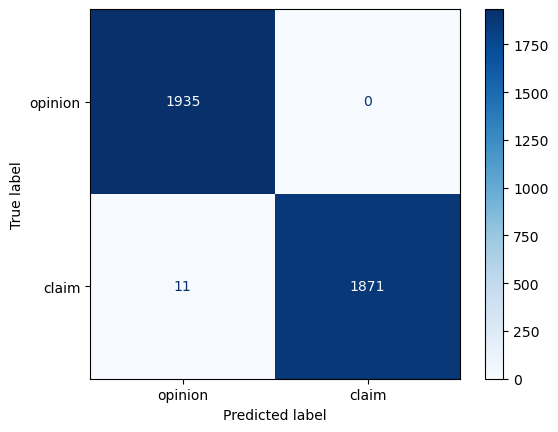

In [114]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['opinion','claim'])

# Plot confusion matrix
log_disp.plot(cmap='Blues', values_format='d');

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [116]:
# Create a classification report
# Create classification report for random forest model
from sklearn.metrics import classification_report

target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [117]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

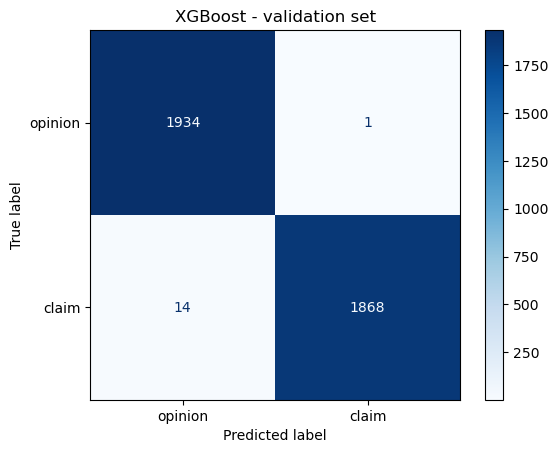

In [118]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['opinion','claim'])

# Plot confusion matrix
log_disp.plot(cmap='Blues', values_format='d');

# Display plot
plt.title('XGBoost - validation set');

In [119]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [120]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

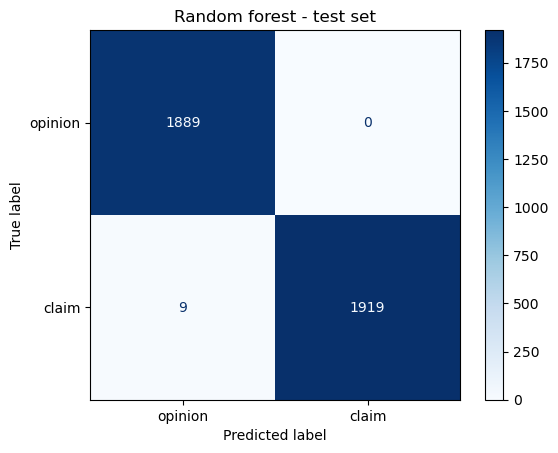

In [122]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['opinion', 'claim'])

# Plot confusion matrix
log_disp.plot(cmap='Blues', values_format='d');

# Display plot
plt.title('Random forest - test set');

#### **Feature importances of champion model**


In [134]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.DataFrame({'Feature': X_test_final.columns, 'Importance': importances})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)
rf_importances.head(10)

,Feature,Importance
1,video_view_count,0.711654
2,video_like_count,0.258697
3,video_share_count,0.016592
19,media claim,0.003419
12,discussion board,0.002459
16,internet forum,0.001837
15,friend read,0.001466
14,friend learned,0.000920
11,colleague read,0.000785
23,social media,0.000687


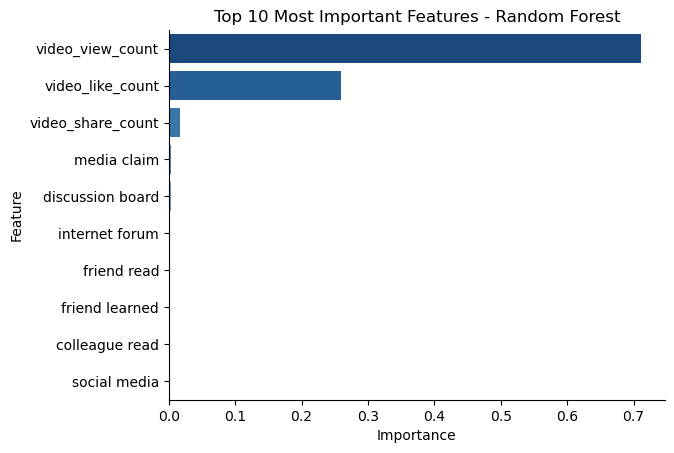

In [145]:
sns.barplot(data=rf_importances.head(10), y='Feature', x='Importance', palette='Blues_r')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features - Random Forest')
sns.despine();

**Question:** Describe your most predictive features. Were your results surprising?

`video_view_count` takes the top and `video_like_count` takes the second. Not much surpise.


### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F<sub>1</sub> scores were consistently high. The model very successfully classified claims and opinions.

2. The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

3. Because the model currently performs nearly perfectly, there is no need to engineer any new features.

4. The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.